## Otsu Method

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import cv2

In [2]:
threshold_values = {}
h = [1]

In [3]:
def Hist(img):
    row, col = img.shape 
    y = np.zeros(256)
    for i in range(0,row):
        for j in range(0,col):
            y[img[i,j]] += 1
    x = np.arange(0,256)
    plt.bar(x, y, color='b', width=5, align='center', alpha=0.25)
    plt.show()
    return y

def regenerate_img(img, threshold):
    row, col = img.shape 
    y = np.zeros((row, col))
    for i in range(0,row):
        for j in range(0,col):
            if img[i,j] >= threshold:
                y[i,j] = 255
            else:
                y[i,j] = 0
    return y

def regenerate_img(img, threshold):
    row, col = img.shape 
    y = np.zeros((row, col))
    for i in range(0,row):
        for j in range(0,col):
            if img[i,j] >= threshold:
                y[i,j] = 255
            else:
                y[i,j] = 0
    return y

def countPixel(h):
    cnt = 0
    for i in range(0, len(h)):
        if h[i]>0:
            cnt += h[i]
    return cnt

In [4]:
def weight(s, e):
    w = 0
    for i in range(s, e):
        w += h[i]
    return w

def mean(s, e):
    m = 0
    w = weight(s, e)
    for i in range(s, e):
        m += h[i] * i
    if float(w)==0:
        return 0
    return m/float(w)

def variance(s, e):
    v = 0
    m = mean(s, e)
    w = weight(s, e)
    for i in range(s, e):
        v += ((i - m) **2) * h[i]
    if w==0:
        v = 0
    else:
        v /= w
    return v

def threshold(h):
    cnt = countPixel(h)
    for i in range(1, len(h)):
        vb = variance(0, i)
        wb = weight(0, i) / float(cnt)
        mb = mean(0, i)
        
        vf = variance(i, len(h))
        wf = weight(i, len(h)) / float(cnt)
        mf = mean(i, len(h))
        
        V2w = wb * (vb) + wf * (vf)
        V2b = wb * wf * (mb - mf)**2
        
        fw = open("trace.txt", "a")
        fw.write('T='+ str(i) + "\n")

        fw.write('Wb='+ str(wb) + "\n")
        fw.write('Mb='+ str(mb) + "\n")
        fw.write('Vb='+ str(vb) + "\n")
        
        fw.write('Wf='+ str(wf) + "\n")
        fw.write('Mf='+ str(mf) + "\n")
        fw.write('Vf='+ str(vf) + "\n")

        fw.write('within class variance='+ str(V2w) + "\n")
        fw.write('between class variance=' + str(V2b) + "\n")
        fw.write("\n")
        
        if not math.isnan(V2w):
            threshold_values[i] = V2w

In [5]:
def get_optimal_threshold():
    min_V2w = min(threshold_values.values())
    optimal_threshold = [k for k, v in threshold_values.items() if v == min_V2w]
    print ('optimal threshold', optimal_threshold[0])
    return optimal_threshold[0]

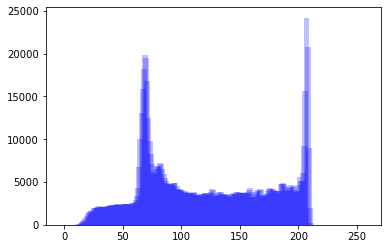

optimal threshold 127


True

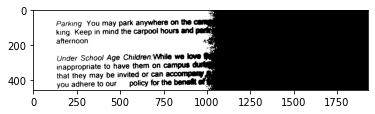

In [6]:
image = Image.open('sample01.png').convert("L")
img = np.asarray(image)
img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

h = Hist(img)
threshold(h)
op_thres = get_optimal_threshold()

res = regenerate_img(img, op_thres)
plt.imshow(res, cmap='gray')
cv2.imwrite('ostu1.png', res)

### Sample01 with Otsu output
Parking You may park anywhere on the c
king. Keep in mind the carpool hours and ¢
afternoon

Under School Age Children:While we love @

inappropriate to have them on campus Gur .
that they may be invited or can accompany &&
you adhere to our _ policy for the benefit «

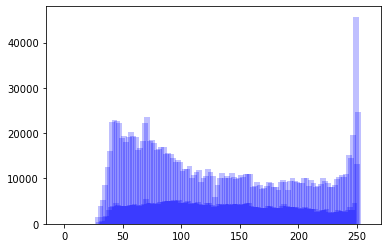

optimal threshold 142


True

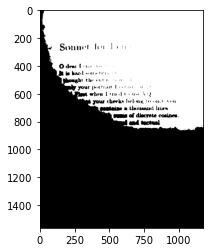

In [7]:
image = Image.open('sample02.png').convert("L")
img = np.asarray(image)
img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

h = Hist(img)
threshold(h)
op_thres = get_optimal_threshold()

res = regenerate_img(img, op_thres)
plt.imshow(res, cmap='gray')
cv2.imwrite('ostu2.png', res)

### Sample02 with Otsu output
Sonnet bo

O dear Petia ovens

be bared werietin 8
peght the ent or i
y your portiart ee ee
when [tre use VQ
zr checks belong too ve
@ thousand lanes

## Adaptive Thresholding

In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

In addition to the parameters described above, the method cv.adaptiveThreshold takes three input parameters:

The adaptiveMethod decides how the threshold value is calculated:

cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.
cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.
The blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.

In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

True

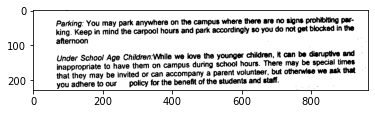

In [11]:
img1 = cv.imread('sample01.png',0)

at1 = cv.adaptiveThreshold(img1,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,67,7)
plt.imshow(at1,'gray')
cv.imwrite('sample01_at.png', at1)

### sample01 with adaptive thresholding output:

Parking: You may park anywhere on the campus where there are no signs prohibiting par-
king. Keep in mind the carpool hours and park accordingly so you do not get blocked in the
afternoon

Under Schoo! Age Children:While we love the younger children, it can be disruptive and
inappropriate to have them on campus during schoo! hours. There may be special times
that they may be invited or can accompany a parent volunteer, but otherwise we ask that
you adhere to our —_ policy for the benefit of the students and staff.

True

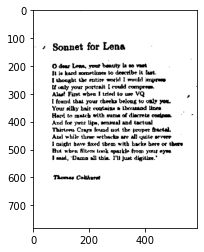

In [12]:
img2 = cv.imread('sample02.png',0)
at2 = cv.adaptiveThreshold(img2,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,59,6)
plt.imshow(at2,'gray')
cv.imwrite('sample02_at.png', at2)

### sample02 with adaptive thresholding (59, 6) output:
+ Sonnet for Lena

© dear Lena, your beeuty la so vast

It is hard sometinies to deocribe it fast.
Tthonght the entice world | would impress
Lf only your portrait [ could compress.

Alas! First when [ tried to use VQ

L found that your cheeks belong to caly you.
Your silky halt ccotains @ Lhoussod lines
Hard to maich with auma of discrete cosines,
And for your lips, sensual and tactua!
Thirters Craya found not the proper fractal,
And while ther sethacks are all quite aeverr
T might bave fixed them with hacke bere or thees
But when filters took sparkle from your eyes
Fesid, ‘Damo all thie. I'll Just digitire.”

Thomas Colthuret

Try to find a way to improve second picture's performance...

### Try Normal Histogram Equlization

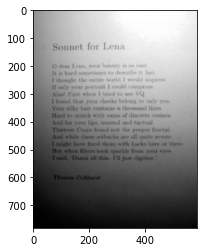

In [14]:
img2 = cv.imread('sample02.png',0)
equ = cv.equalizeHist(img2)
plt.imshow(equ, 'gray') #not much change

###  Adaptive Histogram Equalization - CLAHE (Contrast Limited Adaptive Histogram Equalization)
In CLAHE, image is divided into small blocks called “tiles” (tileSize is 8x8 by default in OpenCV). Then each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified. To avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

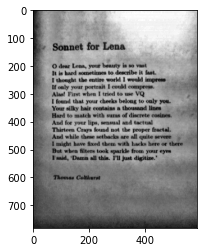

In [15]:
clahe = cv.createCLAHE(clipLimit = 16.0, tileGridSize =(8,8))
cl2 = clahe.apply(img2)
plt.imshow(cl2, 'gray')

True

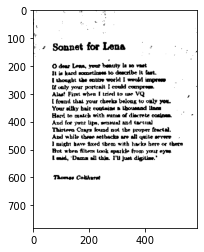

In [16]:
atcl2 = cv.adaptiveThreshold(cl2,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,51,29)
plt.imshow(atcl2,'gray')
cv.imwrite('sample02_atcl.png', atcl2)

### sample02 with histogram equalization and adaptive thresolding output:

Sonnet for Lena :

O dear Lena, your beauty la ea wnat

Ih is hard sometitvs to deacribe it fast.
Ushooght Ut entire world T would imprene
Lf onty your portrait [ could compress.

Alaa! First when [ tried to use ¥Q

L found that your checks belong to only you.
Your silky bait coptaina m Lhoussnod lines
Hard to match with sume of discrete cosines.
And for your lips, setisual and tartual
Thirteen Crays found not ihe proper fractal,
And while theen setbacks are all quite aevere
T might bave fixed them with hacks here or there
But when filters Lonk sparkle from your eyes.
Tsaid, “Damo all chia. I'll just digitize.”

Thomas Colthuret

### Try Gamma Correction


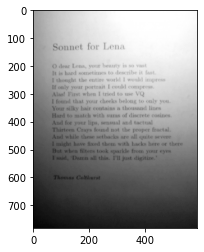

In [17]:
img2 = cv.imread('sample02.png',0)
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, 0.5) * 255.0, 0, 255)
res = cv.LUT(img2, lookUpTable)
plt.imshow(res,'gray')

True

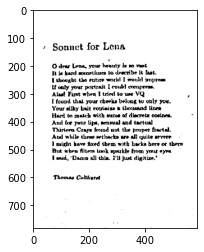

In [18]:
atgm2 = cv.adaptiveThreshold(res,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,51,4)
plt.imshow(atgm2,'gray')
cv.imwrite('sample02_atgm.png', atgm2)

### sample02 with gamma correction (0.5) and adaptive thresolding output:
+ Sonnet for Lena

O dew Lena, your henuty [a oa vant

It is hard sometimes to deacribe it fat.
Uthought the entire world I would impress
Lf only your portrajt [ could compress.

Alas! First when I tried to use ¥Q

L found that your checks belong to only you.
Your silky bait contains m Lhoussod lines
Hard to match with sums of discrete cosines.
And for your lips, sensual and tactuad
Thirtern Crays found not the proper fractal.
And while theme setbacks are all quite aevere
I might bave fixed them with hacks bere of there
But when filters Look sparkle from your eyes
Danid, ‘Daina all thie, I'll just digitize.”

Thomas Colthurst

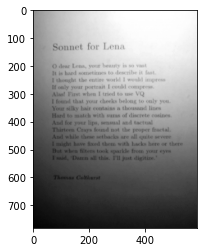

In [19]:
img2 = cv.imread('sample02.png',0)
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, 0.7) * 255.0, 0, 255)
res = cv.LUT(img2, lookUpTable)
plt.imshow(res,'gray')

True

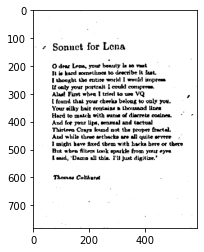

In [20]:
atgm2 = cv.adaptiveThreshold(res,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,51,4)
plt.imshow(atgm2,'gray')
cv.imwrite('sample02_atgm2.png', atgm2)

### sample02 with gamma correction (0.7) and adaptive thresolding output:
+ Sonnet for Lena

© dear Lena, your beauty la oo vast

10 is hard sometiines to deecribe it fast.
Uthonght the entice world | would impress
Lf only your portrajt [ could compress.

Alaa! First when | tried bo use VQ

L found that your checks belong to only you.
Your silky baie ecniaind m Lhoussnd lines
Hard to match with wurns of discrete coalnes.
And for your lips, sensual and tactual
Thirteen Crays found not the proper fractal,
And whilt thee sethacks are all quite aevere
1 might bave fixed them with hacks here of there
But when filter Look sparkle from your eye
Lesid, ‘Damo all thie, I'll just digitize."

Thomas Colthurst

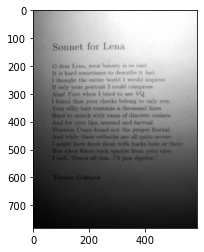

In [21]:
img2 = cv.imread('sample02.png',0)
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, 1) * 255.0, 0, 255)
res = cv.LUT(img2, lookUpTable)
plt.imshow(res,'gray')

True

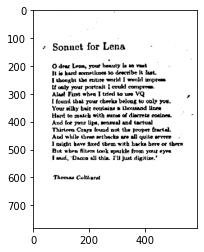

In [22]:
atgm2 = cv.adaptiveThreshold(res,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,51,5)
plt.imshow(atgm2,'gray')
cv.imwrite('sample02_atgm3.png', atgm2)

### sample02 with gamma correction (1.0) and adaptive thresolding output:
¢ Sonnet for Lena , °

O dear Lena, your beauty |s sa vant

It is hard sometiines to describe It fast.
[thonght the entire world would impress

Lf onty yout portrait [ could compress. |

Alas! First when I tried Lo use VQ

LE found that your checks belong to only you.
Your ailky bait coutaind a thousand linea .
Land to match with uma of discrete cosinca.
And for your lipa, sensual and tactual

Thirteen Craya found not the proper fractal,
And while these setbacks are all quite severe

T might bave fixed them with hacks bere of there
Dut when filters Look sparkle from your eyes
Seaid, ‘Damo all this. I'll Just digitize.”

Thomas Coltiinest

### Sharpening & Blurring Filters

True

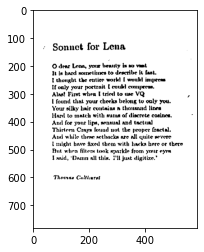

In [23]:
img2 = cv.imread('sample02.png',0)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv.filter2D(img2, -1, sharpen_kernel)
blur = cv.GaussianBlur(sharpen,(5,5),0)
img2 = blur
img2 = cv.adaptiveThreshold(img2,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,75,10)
plt.imshow(img2,'gray')
cv.imwrite('sample02_filter.png', img2)

True

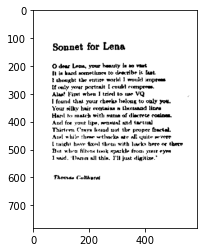

In [24]:
# (75,10) AT with no filter
img2 = cv.imread('sample02.png',0)
img2 = cv.adaptiveThreshold(img2,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,75,10)
plt.imshow(img2,'gray')
cv.imwrite('sample02_nofilter.png', img2)